In [233]:
using Plots, Polynomials, LinearAlgebra
include("../../datatools.jl");

In [234]:
sweetwater_base = get_folder_dataframes("Sweetwater");
sb = copy(sweetwater_base)

folders = ["Gale/East", "Gale/West", "Museum", "Sweetwater"]

all_dfs = Dict()

for f in folders
     all_dfs[f] = get_folder_dataframes(f)
end



In [235]:
plots = []

for street in keys(all_dfs)
     p = plot(title=street, legend=:none, xticks=:none)
     for df in all_dfs[street]
          scatter!(df.latitude, df.altitude)
     end
     push!(plots, p)
end

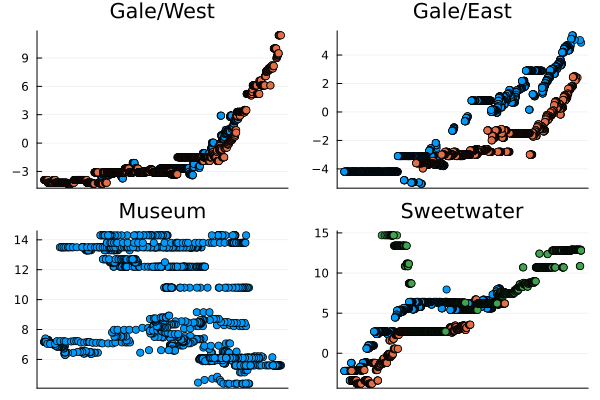

In [236]:
plot(plots...)

In [241]:
function sigmoid(x, a, b)
     res = @. 1.0 / (1.0 + exp(-a * (x-b)))
     return res
end

sigmoid (generic function with 1 method)

In [244]:
using Optim

In [265]:
function fit_model_to_data(xs, ys, model_func, initial_params)
     
     function loss(params)
          predicted_y = model_func(xs, params...)
          return sum((predicted_y - ys) .^ 2)
     end

     opt_res = optimize(loss, initial_params)
     # @show opt_res
     opt_params = Optim.minimizer(opt_res)

     # @show opt_params
     fitted_ys = model_func(xs, opt_params...)

     return fitted_ys
end

fit_model_to_data (generic function with 1 method)

In [286]:
gwdf = stack_df_vectors(all_dfs["Gale/West"]);

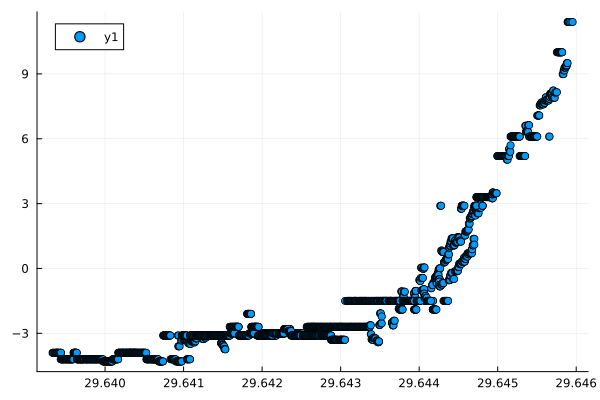

In [283]:
scatter(gwdf.latitude, gwdf.altitude)

In [289]:
function expo(xs, a, b, c)
     return  @. a * exp.(b * xs) + c
end

expo (generic function with 3 methods)

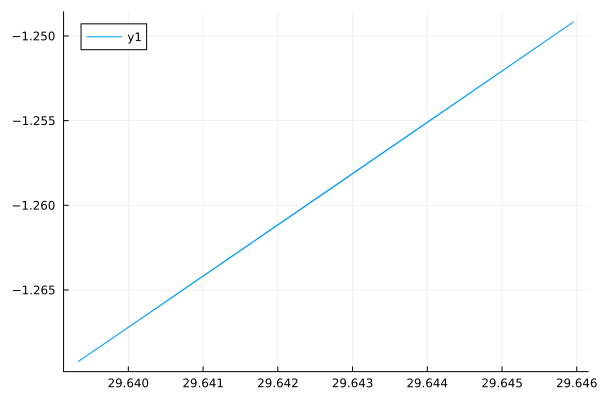

In [295]:
fit_ys = fit_model_to_data(gwdf.latitude, gwdf.altitude, expo, [0.0, 1.0, 1.1]);

plot(gwdf.latitude, fit_ys)